In [1]:
import DecisionTreeRegressor as dtr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
#Define a simple range of values for x and reshape so sklearn likes it.
x = np.linspace(0,1,200)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
x = x - 0.5

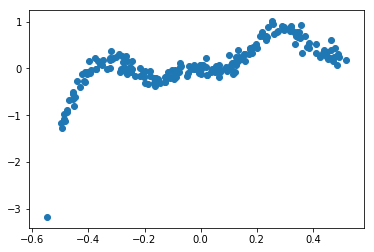

In [3]:
plt.scatter(x, y)

In [4]:
df = pd.DataFrame(data=x, columns=['x_data'])
df['output'] = pd.DataFrame(data=y)
df.head()

,x_data,output
0,-0.493175,-1.264360
1,-0.548715,-3.184006
2,-0.486116,-0.975715
3,-0.498256,-1.166291
4,-0.453468,-0.555855


In [5]:
def split_data(data, split_value):
    mask = data[:, 0]<= split_value
    data_below = data[mask]
    data_above = data[~mask]
    return data_below, data_above

In [6]:
## Linear Regression
# def piecewise_regression(x1, x2, y1, y2, x0):
#     x1 = x[x<=x0]
#     x2 = x[x>x0]
#     y1 = y[x<=x0]
#     y2 = y[x>x0]
#     print(x1.shape, x2.shape, y1.shape)

def piecewise_regression(x, y, x0):
    x1 = x[x<=x0]
    x2 = x[x>x0]
    y1 = y[x<=x0]
    y2 = y[x>x0]
    
    n = len(x)
    X1 = np.maximum(0., x0-x1)
    X2 = np.maximum(0., x2-x0)
    
    sy = np.sum(y1)+np.sum(y2)
    sX12 = np.sum(X1**2)
    sX22 = np.sum(X2**2)
    
    sX1y1 = np.sum(X1*y1)
    sX1 = np.sum(X1)
    
    sX2y2 = np.sum(X2*y2)
    sX2 = np.sum(X2)
    
    b0 = (sy*sX12*sX22 - sX1y1*sX1*sX22 - sX2y2*sX2*sX12)/(n*sX12*sX22 - (sX1**2)*sX22 - (sX2**2)*sX12)
    
    m1 = (sX1y1 - b0*sX1)/sX12
    m2 = (sX2y2 - b0*sX2)/sX22
    
    return m1, m2, b0, x0
    ###########33
#     sy = np.sum(y)
#     sx = np.sum(x)
#     sx2 = np.sum(np.square(x))
#     sxy = np.sum(x*y)

#     # y = mx+c
#     z = (n*sx2 - sx**2)
#     m = (n*sxy - sx*sy)/z
#     c = (sy*sx2 - sx*sxy)/z
#     return m, c

def output(x, m1, m2, b0, x0, **kwargs):
    y = b0 + m1*np.maximum(0, x0-x) + m2*np.maximum(0, x-x0)
    return y

def error(target, output):
    return np.sqrt(np.square(target-output).mean())

In [7]:
def get_potential_splits(col):
    potential_splits = {}
        
    unique_values = np.unique(col)

    potential_splits= []
    for index in range(1, len(unique_values)):
            current_value = unique_values[index]
            previous_value = unique_values[index-1]

            potential_split = (current_value + previous_value)/2

            potential_splits.append(potential_split)
    return np.array(potential_splits)

pot_splits = get_potential_splits(x)
pot_splits[50]

-0.25613142445949055

Error  0.2546016063261291


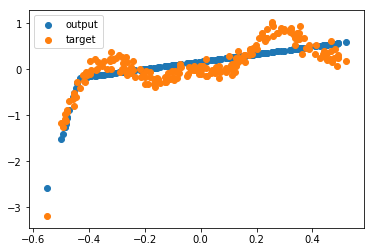

In [8]:
m1, m2, b0, x0 = piecewise_regression(x, y, pot_splits[14])
outputs = output(x, m1, m2, b0, x0)
targets = y
print('Error ',error(targets, outputs))

plt.scatter(x, outputs, label='output')
plt.scatter(x, targets, label='target')

plt.legend()

plt.show()

In [9]:
pot_splits = get_potential_splits(x)

In [10]:
# split_data(df.values, pot_splits[30])

In [11]:
def calculate_overall_error(x, y, x0):
    m1, m2, b0, x0 = piecewise_regression(x, y, x0)
    outputs = output(x, m1, m2, b0, x0)
    targets = y
    err = error(targets, outputs)

    return err,  {'m1':m1, 'm2': m2, 'b0':b0, 'x0':x0 } #, 'e1':err1, 'e2':err2}

In [12]:
def determine_best_split(data, potential_splits):
    
    overall_err = 99999999
    best_split_value = potential_splits[0]
    vals = {}
    for value in potential_splits[:-1]:
#         data_below, data_above = split_data(data, split_value=value)
        current_overall_error, val = calculate_overall_error(data[:, 0],data[:,1], value)
#         print(value, current_overall_error)

        if current_overall_error <= overall_err:
            overall_err = current_overall_error
            best_split_value = value
            vals = val
    vals['error'] = overall_err
    return vals

In [13]:
np.c_[x,y].shape, df.values.shape

((200, 2), (200, 2))

In [14]:
pot_splits = get_potential_splits(x)

In [15]:
vals = determine_best_split(df.values, pot_splits)
print(vals)

{'m1': -24.098794445991103, 'm2': 0.8365818043205975, 'b0': -0.21181404876772789, 'x0': -0.4438962510199097, 'error': 0.2542622837224268}


{'m1': -24.098794445991103, 'm2': 0.8365818043205975, 'b0': -0.21181404876772789, 'x0': -0.4438962510199097, 'error': 0.2542622837224268}


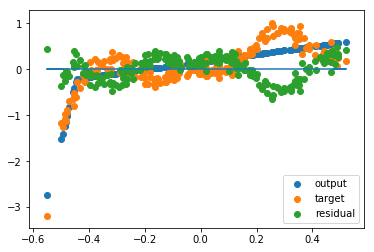

In [16]:
values = {}

vals = determine_best_split(df.values, pot_splits)
values[0] = vals
print(vals)
outputs = output(x, **vals)
targets = y
# print('Error ', vals['error'], '  split_at', x0)
# print(vals)

plt.scatter(x, outputs, label='output')
plt.scatter(x, targets, label='target')

residual = outputs - targets
plt.scatter(x, residual, label='residual')
plt.plot(x, np.zeros_like(x))

plt.legend()

plt.show()

{'m1': -0.21121823692781497, 'm2': -3.337828365066338, 'b0': 0.11432199852287375, 'x0': 0.35653343479586724, 'error': 0.23470269760907556}


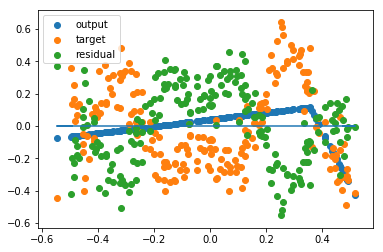

In [17]:
targets = -residual
vals = determine_best_split(np.c_[x, targets], pot_splits)
values[1] = vals
print(vals)
outputs = output(x, **vals)

plt.scatter(x, outputs, label='output')
plt.scatter(x, targets, label='target')

residual = outputs - targets
plt.scatter(x, residual, label='residual')
plt.plot(x, np.zeros_like(x))
plt.legend()
plt.show()

{'m1': 0.9523552857111353, 'm2': 0.7309357410825091, 'b0': -0.21002952187362608, 'x0': -0.0468221535465673, 'error': 0.20038855805867528}


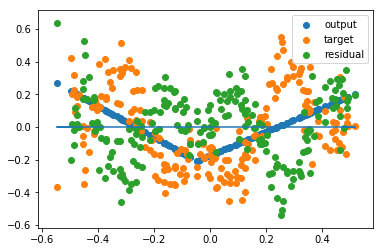

In [18]:
targets = -residual
vals = determine_best_split(np.c_[x, targets], pot_splits)
values[2] = vals
print(vals)
outputs = output(x, **vals)

plt.scatter(x, outputs, label='output')
plt.scatter(x, targets, label='target')

residual = outputs - targets
plt.scatter(x, residual, label='residual')
plt.plot(x, np.zeros_like(x))
plt.legend()
plt.show()

{'m1': -0.17457476247088152, 'm2': -1.8232562550667408, 'b0': 0.08964483173259702, 'x0': 0.322609430682065, 'error': 0.18828457726736877}


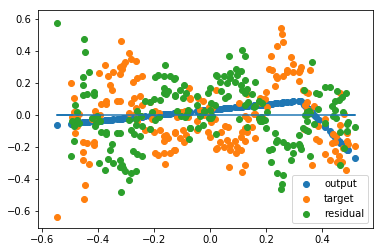

In [19]:
targets = -residual
vals = determine_best_split(np.c_[x, targets], pot_splits)
values[3] = vals
print(vals)
outputs = output(x, **vals)

plt.scatter(x, outputs, label='output')
plt.scatter(x, targets, label='target')

residual = outputs - targets
plt.scatter(x, residual, label='residual')
plt.plot(x, np.zeros_like(x))
plt.legend()
plt.show()

{'m1': 0.26712444171407956, 'm2': 0.4005591053129446, 'b0': -0.08119935254872174, 'x0': 0.06613569763534255, 'error': 0.18198230630475057}


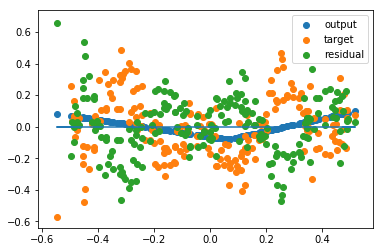

In [20]:
targets = -residual
vals = determine_best_split(np.c_[x, targets], pot_splits)
values[4] = vals
print(vals)
outputs = output(x, **vals)

plt.scatter(x, outputs, label='output')
plt.scatter(x, targets, label='target')

residual = outputs - targets
plt.scatter(x, residual, label='residual')
plt.plot(x, np.zeros_like(x))
plt.legend()
plt.show()

{'m1': -2.2364264785824037, 'm2': -0.12939180564540897, 'b0': 0.07146003956050716, 'x0': -0.3685158559543377, 'error': 0.1720387760520213}


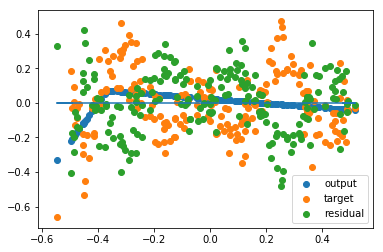

In [21]:
targets = -residual
vals = determine_best_split(np.c_[x, targets], pot_splits)
values[5] = vals
print(vals)
outputs = output(x, **vals)

plt.scatter(x, outputs, label='output')
plt.scatter(x, targets, label='target')

residual = outputs - targets
plt.scatter(x, residual, label='residual')
plt.plot(x, np.zeros_like(x))
plt.legend()
plt.show()

{'m1': 0.3903872964089903, 'm2': 0.1721875343500298, 'b0': -0.06174421528945259, 'x0': -0.1368605210400554, 'error': 0.16801825625555092}


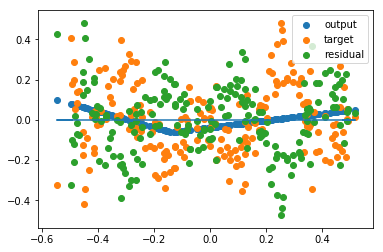

In [22]:
targets = -residual
vals = determine_best_split(np.c_[x, targets], pot_splits)
values[6] = vals
print(vals)
outputs = output(x, **vals)

plt.scatter(x, outputs, label='output')
plt.scatter(x, targets, label='target')

residual = outputs - targets
plt.scatter(x, residual, label='residual')
plt.plot(x, np.zeros_like(x))
plt.legend()
plt.show()

{'m1': -0.11313576730220444, 'm2': -0.8656888276148097, 'b0': 0.05538421516630139, 'x0': 0.29337921385210514, 'error': 0.1633926086038154}


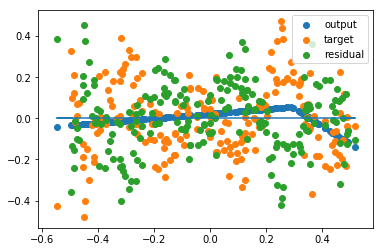

In [23]:
targets = -residual
vals = determine_best_split(np.c_[x, targets], pot_splits)
values[7] = vals
print(vals)
outputs = output(x, **vals)

plt.scatter(x, outputs, label='output')
plt.scatter(x, targets, label='target')

residual = outputs - targets
plt.scatter(x, residual, label='residual')
plt.plot(x, np.zeros_like(x))
plt.legend()
plt.show()

{'m1': 0.16177305484491442, 'm2': 0.2500022036767321, 'b0': -0.049795748632830567, 'x0': 0.07112604132660838, 'error': 0.1606751914706885}


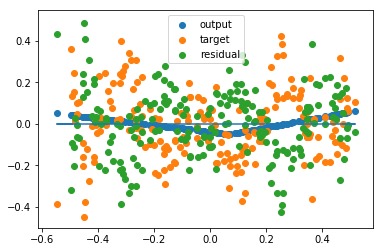

In [24]:
targets = -residual
vals = determine_best_split(np.c_[x, targets], pot_splits)
values[8] = vals
print(vals)
outputs = output(x, **vals)

plt.scatter(x, outputs, label='output')
plt.scatter(x, targets, label='target')

residual = outputs - targets
plt.scatter(x, residual, label='residual')
plt.plot(x, np.zeros_like(x))
plt.legend()
plt.show()

(9, 200) [-1.35610899e+00 -2.74807965e+00 -1.17918937e+00 -1.48345433e+00
 -3.60952001e-01 -1.09520551e+00 -9.49434045e-01 -9.31355166e-01
 -1.19357880e+00 -3.21324494e-01 -1.91264240e-01 -3.83249569e-01
 -8.01672406e-02 -7.55507793e-01 -5.15156405e-02 -4.07755443e-01
 -6.07308140e-02 -7.06093584e-02 -1.16025045e-01 -9.87825204e-02
  9.71738602e-03 -5.40022982e-02 -6.62843225e-02 -3.55635686e-02
 -3.29083537e-02 -2.60963389e-02  7.62876888e-03  2.12802980e-03
 -4.80393744e-03  5.49770132e-03 -5.91377164e-04 -2.25964980e-02
 -1.16063899e-02 -1.60961930e-02  1.30934401e-02  8.26442718e-03
 -1.35814037e-02 -3.47384920e-02 -2.93642330e-02 -1.10858005e-02
 -3.04222633e-02 -1.06187477e-02 -4.46061757e-02 -1.66582424e-02
 -3.40287454e-02 -4.55315100e-02 -3.98602710e-02 -3.71912639e-02
 -5.62477895e-02 -4.55230321e-02 -4.35818508e-02 -5.31301167e-02
 -5.23007593e-02 -4.36942304e-02 -5.63521826e-02 -7.71942172e-02
 -8.16318391e-02 -7.24466598e-02 -9.09842482e-02 -6.12496703e-02
 -7.19360551e-02

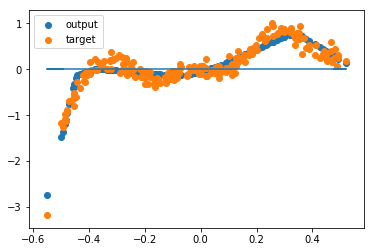

In [25]:
output_list = []
for i, val in values.items():
    out = output(x, **val)
    output_list.append(out)
outputs = np.array(output_list)
print (outputs.shape, outputs.sum(axis=0))
outputs = outputs.sum(axis=0)
targets = y

plt.scatter(x, outputs, label='output')
plt.scatter(x, targets, label='target')
plt.plot(x, np.zeros_like(x))
plt.legend()
plt.show()

{'m1': -13.401036429277788, 'm2': 0.8268265924714633, 'b0': -0.17899358948563918, 'x0': -0.419337882908341, 'error': 0.2509955522474443}


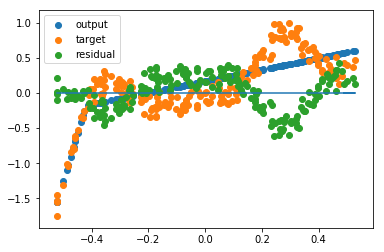

In [271]:
values = {}

vals = determine_best_split(df.values, pot_splits)
values[0] = vals
print(vals)
outputs = output(x, **vals)
targets = y
# print('Error ', vals['error'], '  split_at', x0)
# print(vals)

plt.scatter(x, outputs, label='output')
plt.scatter(x, targets, label='target')

residual = outputs - targets
plt.scatter(x, residual, label='residual')
plt.plot(x, np.zeros_like(x))

plt.legend()

plt.show()

In [226]:
split_data(np.c_[x, y], vals['x0'])

(array([[-0.52152593, -1.55815323],
        [-0.48212896, -1.03973827],
        [-0.52231993, -1.54000059],
        [-0.48776479, -1.01003501],
        [-0.52071379, -1.74745038],
        [-0.52149581, -1.45336316],
        [-0.46302404, -0.79312032],
        [-0.4991751 , -1.30604232],
        [-0.47358752, -0.83383013],
        [-0.46575334, -0.76940212],
        [-0.45662795, -0.64549265],
        [-0.45723326, -0.60681594],
        [-0.42953154, -0.3516969 ],
        [-0.44884456, -0.5298653 ],
        [-0.43691062, -0.34594772],
        [-0.42509258, -0.25896578]]), array([[-0.40897473, -0.02680824],
        [-0.39494291,  0.05234379],
        [-0.38053725,  0.1234371 ],
        [-0.36812582, -0.00891523],
        [-0.39166898, -0.12307889],
        [-0.37080494,  0.17359922],
        [-0.41358319, -0.21631604],
        [-0.40380277,  0.05286825],
        [-0.35173338,  0.08550906],
        [-0.36216629, -0.03464309],
        [-0.39258463,  0.19955107],
        [-0.36938214,  0.19

In [227]:
yy = residual
x0 = vals['x0']

[[-0.52152593  0.00973389]
 [-0.48212896  0.01927916]
 [-0.52231993 -0.01905918]
 [-0.48776479 -0.08595   ]
 [-0.52071379  0.20991461]
 [-0.52149581 -0.09465259]
 [-0.46302404  0.02868694]
 [-0.4991751   0.05714724]
 [-0.47358752 -0.07216485]
 [-0.46575334 -0.03160677]
 [-0.45662795 -0.03322644]
 [-0.45723326 -0.08001491]
 [-0.42953154  0.03609778]
 [-0.44884456 -0.04454833]
 [-0.43691062 -0.06853876]
 [-0.42509258  0.0028533 ]] [[-0.40897473 -0.14361681]
 [-0.39494291 -0.21116697]
 [-0.38053725 -0.2703493 ]
 [-0.36812582 -0.12773486]
 [-0.39166898 -0.03303731]
 [-0.37080494 -0.31246448]
 [-0.41358319  0.04208058]
 [-0.40380277 -0.219017  ]
 [-0.35173338 -0.20860545]
 [-0.36216629 -0.0970795 ]
 [-0.39258463 -0.35642435]
 [-0.36938214 -0.33473093]
 [-0.36707215 -0.26857282]
 [-0.35195972 -0.39758338]
 [-0.3583705  -0.13154026]
 [-0.35677189 -0.44898923]
 [-0.35612769 -0.30872894]
 [-0.32980526 -0.35521737]
 [-0.29034255 -0.20032078]
 [-0.31307441 -0.15341797]
 [-0.31395977 -0.23026975]


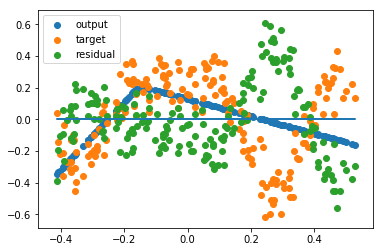

In [273]:
new_data = np.c_[x, residual]
data_bel, data_abo = split_data(new_data, x0)
print(data_bel, data_abo)
print(pot_splits[pot_splits>x0])

vals = determine_best_split(data_abo, pot_splits[pot_splits>x0])
print(vals)

xx = data_abo[:,0]
outputs = output(xx, **vals)
targets = data_abo[:,1]

residual = outputs - targets

# print('Error ', vals['error'], '  split_at', x0)

plt.scatter(xx, outputs, label='output')
plt.scatter(xx, targets, label='target')
plt.scatter(xx, residual, label='residual')
plt.plot(xx, np.zeros_like(xx))

plt.legend()

plt.show()